<a href="https://colab.research.google.com/github/omar0-0salah/Selected1_Assignment1/blob/main/FIFAPlayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#modules used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [ ]:
#data used
data = pd.read_csv('/content/fifa_players.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [ ]:
#drop columnes with na's and some more strange columns, doesnt seem like other columns have any missing values
data = data.drop(columns = ["release_clause_euro", "national_team", "national_rating", "national_team_position",
                           "national_jersey_number", "body_type", "international_reputation(1-5)", "weak_foot(1-5)",
                           "skill_moves(1-5)", "potential", "full_name", "birth_date"], axis = 1)
data = data.dropna()
data.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,62000000.0,165000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,60000000.0,135000.0,Right,...,15,87,88,24,49,33,80,91,88,87


In [ ]:
#no goalkeeping stats specifically, yet goalkeepers are in the data so this code filters gks
data = data.query("positions != 'GK'")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15675 entries, 0 to 17953
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               15675 non-null  object 
 1   age                15675 non-null  int64  
 2   height_cm          15675 non-null  float64
 3   weight_kgs         15675 non-null  float64
 4   positions          15675 non-null  object 
 5   nationality        15675 non-null  object 
 6   overall_rating     15675 non-null  int64  
 7   value_euro         15675 non-null  float64
 8   wage_euro          15675 non-null  float64
 9   preferred_foot     15675 non-null  object 
 10  crossing           15675 non-null  int64  
 11  finishing          15675 non-null  int64  
 12  heading_accuracy   15675 non-null  int64  
 13  short_passing      15675 non-null  int64  
 14  volleys            15675 non-null  int64  
 15  dribbling          15675 non-null  int64  
 16  curve              15675 no

In [ ]:
#use a sample to make analysis less computationally intensive
data = data.sample(n = 5000, random_state = 11)
data.describe()

,age,height_cm,weight_kgs,overall_rating,value_euro,wage_euro,crossing,finishing,heading_accuracy,short_passing,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.00000,5000.000000
mean,25.502600,173.454568,74.484000,66.44120,2.609333e+06,10391.40000,54.371800,49.987000,57.191400,62.557600,...,51.427400,59.521400,50.18920,55.022400,55.622000,52.25340,60.544200,51.13060,51.77860,49.507200
std,4.638825,13.891071,6.769309,6.85953,5.913988e+06,23248.56781,13.939126,16.391198,11.597692,9.796074,...,15.808539,14.434529,18.96996,14.621897,12.891639,12.62855,10.255783,17.28447,19.18124,19.126356
min,17.000000,152.400000,53.100000,47.00000,1.000000e+04,1000.00000,11.000000,10.000000,18.000000,25.000000,...,11.000000,21.000000,10.00000,12.000000,15.000000,13.00000,31.000000,10.00000,10.00000,10.000000
25%,22.000000,154.940000,69.900000,62.00000,3.500000e+05,2000.00000,45.000000,36.000000,49.000000,57.000000,...,40.000000,50.000000,33.00000,47.000000,47.000000,42.00000,53.000000,37.00000,35.00000,32.000000
50%,25.000000,175.260000,74.800000,66.00000,7.500000e+05,3000.00000,57.000000,53.000000,58.000000,64.000000,...,54.000000,61.000000,56.00000,58.000000,57.000000,52.00000,61.000000,55.00000,58.00000,56.000000
75%,29.000000,185.420000,78.900000,71.00000,2.300000e+06,9000.00000,65.000000,63.000000,65.250000,69.000000,...,64.000000,70.000000,65.00000,65.000000,65.000000,62.00000,68.000000,65.00000,67.00000,65.000000
max,40.000000,203.200000,110.200000,94.00000,8.900000e+07,420000.00000,91.000000,94.000000,93.000000,93.000000,...,93.000000,94.000000,90.00000,95.000000,92.000000,92.00000,95.000000,94.00000,89.00000,90.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>,
        <Axes: title={'center': 'weight_kgs'}>,
        <Axes: title={'center': 'overall_rating'}>,
        <Axes: title={'center': 'value_euro'}>,
        <Axes: title={'center': 'wage_euro'}>,
        <Axes: title={'center': 'crossing'}>],
       [<Axes: title={'center': 'finishing'}>,
        <Axes: title={'center': 'heading_accuracy'}>,
        <Axes: title={'center': 'short_passing'}>,
        <Axes: title={'center': 'volleys'}>,
        <Axes: title={'center': 'dribbling'}>,
        <Axes: title={'center': 'curve'}>,
        <Axes: title={'center': 'freekick_accuracy'}>],
       [<Axes: title={'center': 'long_passing'}>,
        <Axes: title={'center': 'ball_control'}>,
        <Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'sprint_speed'}>,
        <Axes: title={'center': 'agility'}>,
        <Axes: title={'center': 'reactions'}>,
        <Axes: title={'center': 'ba

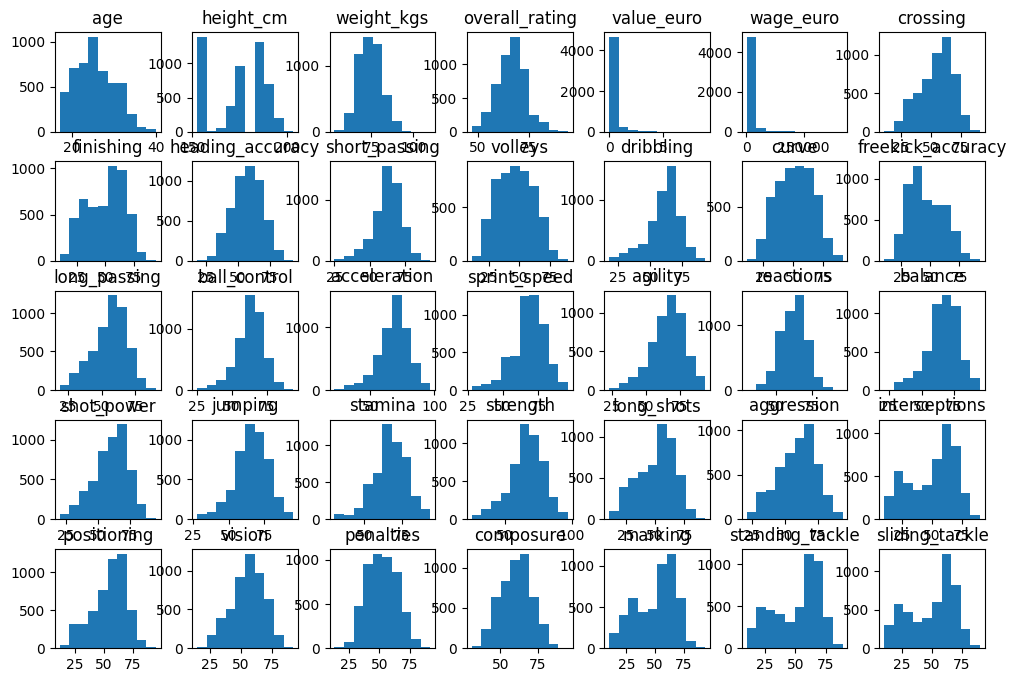

In [ ]:
#Quite cluttered but shows the distributions of the data
data.hist(grid = False, layout = (5,7), figsize = (12,8))

In [ ]:
data['physical'] = (data["strength"] + data["sprint_speed"] + data["agility"] + data["reactions"] + data["stamina"] +
                   data["jumping"] + data["balance"] + data["acceleration"])/8

data['defensive_skill'] = (data["sliding_tackle"] + data["standing_tackle"] + data["interceptions"] + data["marking"] +
                          data["positioning"] + data["aggression"])/6

data["football_skills"] = (data["ball_control"] + data["short_passing"] + data["long_passing"] + data["composure"] +
                          data["vision"] + data["dribbling"])/6

data["offensive_skills"] = (data["crossing"] + data["finishing"] + data["long_shots"] + data["volleys"] +
                           data["heading_accuracy"])/5

<Axes: >

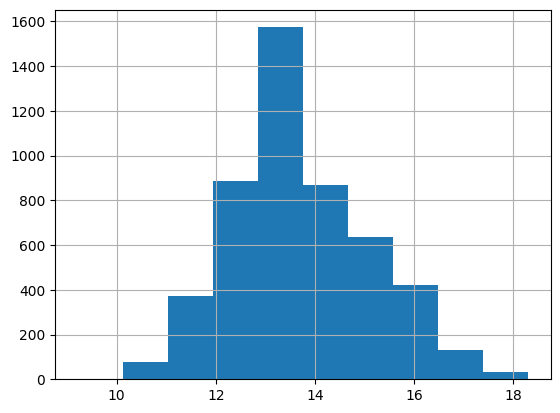

In [ ]:
#value varies greatly, so use log transformation for modelling
data["value_euro"] = np.log(data["value_euro"])
data["value_euro"].hist()

Text(0.5, 1.0, 'Physical ability ~ Player value, euros')

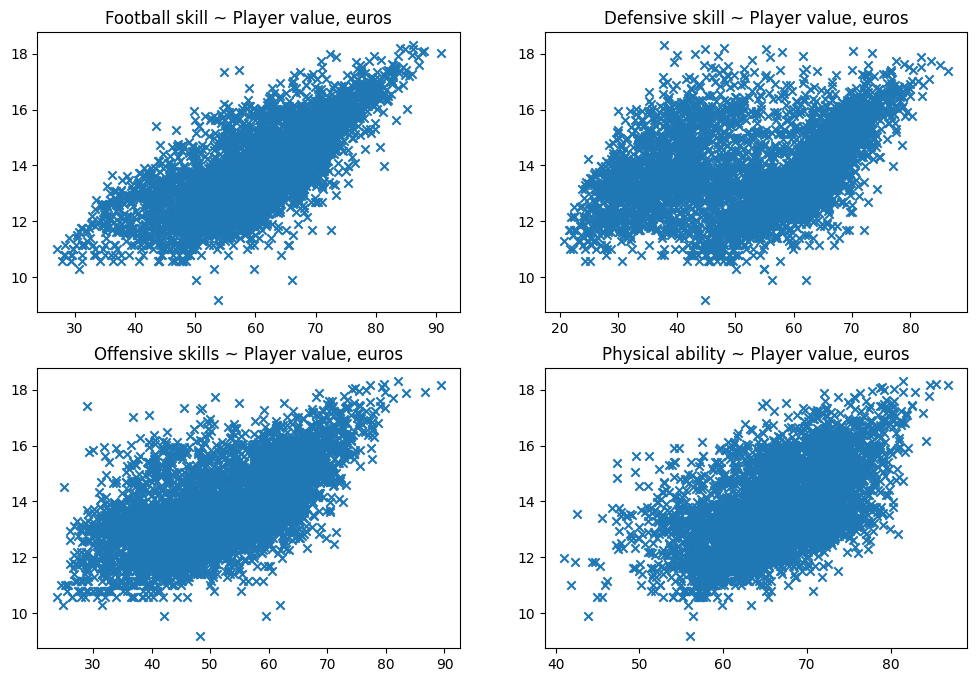

In [ ]:
#visualise relationship between skills and player value
figure, axis = plt.subplots(2, 2, figsize = (12,8))
axis[0,0].scatter(x=data["football_skills"], y = data["value_euro"], marker = 'x')
axis[0,0].set_title("Football skill ~ Player value, euros")

axis[0,1].scatter(x=data["defensive_skill"], y = data["value_euro"], marker = 'x')
axis[0,1].set_title("Defensive skill ~ Player value, euros")

axis[1,0].scatter(x=data["offensive_skills"], y = data["value_euro"], marker = 'x')
axis[1,0].set_title("Offensive skills ~ Player value, euros")

axis[1,1].scatter(x=data["physical"], y = data["value_euro"], marker = 'x')
axis[1,1].set_title("Physical ability ~ Player value, euros")

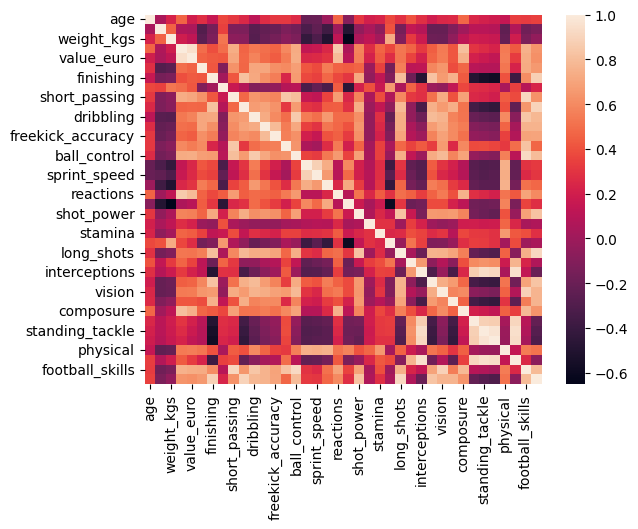

In [ ]:
#heatmap for data
data_corr = data.drop(columns = ["name", "nationality", "positions", "preferred_foot", "wage_euro"], axis = 1)
cor = data_corr.corr(method = "pearson")
a = sns.heatmap(cor)

In [ ]:
#correlation matrix
from scipy.stats import pearsonr
rho = cor
pval = cor.corr(method = lambda x, y: pearsonr(x,y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.05, 0.01, 0.001] if x<=t]))
rho.round(2).astype(str) + p

<ipython-input-13-517f2537d508>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [0.05, 0.01, 0.001] if x<=t]))


,age,height_cm,weight_kgs,overall_rating,value_euro,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,composure,marking,standing_tackle,sliding_tackle,physical,defensive_skill,football_skills,offensive_skills
age,1.0***,0.04,0.23**,0.46***,0.19,0.27,0.15,0.36***,0.31,0.25,...,0.24,0.26,0.48***,0.24,0.21,0.19,0.15,0.33*,0.33,0.35
height_cm,0.04,1.0***,0.45***,0.06,0.05,-0.3***,-0.15***,0.34***,-0.12**,-0.12***,...,-0.21***,-0.11**,0.01,0.11**,0.1**,0.08**,-0.24***,0.08*,-0.18***,-0.13***
weight_kgs,0.23**,0.45***,1.0***,0.19,0.13,-0.26***,-0.13***,0.52***,-0.07**,-0.08***,...,-0.2***,-0.05**,0.12,0.19***,0.18**,0.16**,-0.21***,0.19**,-0.13***,-0.05**
overall_rating,0.46***,0.06,0.19,1.0***,0.95***,0.49**,0.39**,0.49,0.73***,0.46**,...,0.54***,0.42**,0.81***,0.3,0.26,0.22,0.54*,0.43,0.75***,0.63***
value_euro,0.19,0.05,0.13,0.95***,1.0***,0.46***,0.43***,0.41,0.71***,0.47***,...,0.54***,0.41***,0.74***,0.21,0.17,0.13,0.55**,0.32,0.73***,0.62***
crossing,0.27,-0.3***,-0.26***,0.49**,0.46***,1.0***,0.42***,-0.11***,0.63***,0.47***,...,0.64***,0.38***,0.47***,0.1**,0.09**,0.08**,0.53***,0.23*,0.73***,0.65***
finishing,0.15,-0.15***,-0.13***,0.39**,0.43***,0.42***,1.0***,0.02**,0.42***,0.82***,...,0.66***,0.75***,0.43***,-0.5***,-0.55***,-0.58***,0.41***,-0.39***,0.61***,0.88***
heading_accuracy,0.36***,0.34***,0.52***,0.49,0.41,-0.11***,0.02**,1.0***,0.17,0.08*,...,-0.05**,0.13*,0.37,0.27***,0.26**,0.24**,0.04***,0.34***,0.1*,0.23*
short_passing,0.31,-0.12**,-0.07**,0.73***,0.71***,0.63***,0.42***,0.17,1.0***,0.47***,...,0.73***,0.41***,0.68***,0.25,0.23,0.2,0.43**,0.38,0.91***,0.63***
volleys,0.25,-0.12***,-0.08***,0.46**,0.47***,0.47***,0.82***,0.08*,0.47***,1.0***,...,0.66***,0.74***,0.51***,-0.36***,-0.4***,-0.43***,0.4***,-0.24***,0.64***,0.89***


In [ ]:
#model preprocessing
y = data["value_euro"]
X = X = pd.DataFrame(data = data, columns = ('offensive_skills', 'football_skills', 'defensive_skill', 'physical','age',
                                        'height_cm', 'weight_kgs', 'freekick_accuracy',
                                        'penalties'))
X.head()

,offensive_skills,football_skills,defensive_skill,physical,age,height_cm,weight_kgs,freekick_accuracy,penalties
10500,56.8,62.666667,40.166667,70.500,28,154.94,74.8,68,59
2095,42.2,48.833333,61.833333,60.375,22,187.96,77.1,30,44
6755,36.4,37.333333,54.500000,56.375,20,187.96,78.0,31,41
6722,43.8,54.833333,44.500000,67.250,23,172.72,66.2,39,43
5234,40.8,43.500000,47.000000,56.375,21,185.42,78.9,28,37


In [ ]:
left_foot = []
for x in data["preferred_foot"]:
    if x == "Left":
        left_foot.append(1)
    else:
        left_foot.append(0)
X["left"] = left_foot
X.head()

,offensive_skills,football_skills,defensive_skill,physical,age,height_cm,weight_kgs,freekick_accuracy,penalties,left
10500,56.8,62.666667,40.166667,70.500,28,154.94,74.8,68,59,0
2095,42.2,48.833333,61.833333,60.375,22,187.96,77.1,30,44,0
6755,36.4,37.333333,54.500000,56.375,20,187.96,78.0,31,41,0
6722,43.8,54.833333,44.500000,67.250,23,172.72,66.2,39,43,0
5234,40.8,43.500000,47.000000,56.375,21,185.42,78.9,28,37,0


In [ ]:
#insert constant for the stats_models modelling
X_con = sm.add_constant(X, prepend = False)

In [ ]:
#first model
model_1 = sm.OLS(y, X_con)
res = model_1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             value_euro   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1156.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:16:53   Log-Likelihood:                -5717.8
No. Observations:                5000   AIC:                         1.146e+04
Df Residuals:                    4989   BIC:                         1.153e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
offensive_skills      0.0232      0.00

In [ ]:
#creating a linear model for predicting
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 11,
                                                   test_size = .25)

In [ ]:
model2 = LinearRegression().fit(X_train, y_train)
y_pred_lin_reg = model2.predict(X_test)

In [ ]:
print("Mean squared error, predicting log(value) of players with linear regression:")
print(mean_squared_error(y_test, y_pred_lin_reg))
#important to note that we are assessing log of value, so effects of X are percentage affect on value.
#not the best model for predictions

Mean squared error, predicting log(value) of players with linear regression:
0.5919518943315817


In [ ]:
#forest model predictions
forest = RandomForestRegressor(n_estimators = 500,
                               criterion = 'squared_error',
                               random_state = 11,
                               max_depth = 4)
model_forest = forest.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)

In [ ]:
print("Mean squared error, predicting log(value) of players with random forest regressor:")
print(mean_squared_error(y_test, y_pred_forest))
#much smaller error, improved model

Mean squared error, predicting log(value) of players with random forest regressor:
0.4317261920456547
